In [55]:
%load_ext autoreload
%autoreload 2

import preprocessing as prep
import sys
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

from bb_binary import FrameContainer, Repository, load_frame_container
from pandas import DataFrame, Series

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_files(path):
    repo = Repository(path)
    file = list(repo.iter_fnames())
    a = [f.split('/')[-1].split("_")[1] for f in file]
    l = len(a)/4
    npa = np.array(file).reshape(int(l),4)
    return npa

In [3]:
def run():
    CONFIDENCE = 0.9
    DISTANCE = 160
    MONTH = 10
    xmax = 3000
    ymax = 4000
    LENGTH = 3

    #f = "../../data/1h/"
    f = "../00_Data/testset_2015_1h/"
    p = "2015" + str(MONTH) + "2215"
    path = f+p


    files = get_files(path)

    dataframes = DataFrame()
    
    for e, file_list in enumerate(files[:4]):

        for i in list(range(4)):
            fc = load_frame_container(file_list[i])
            df = prep.get_dataframe(fc)
            df = prep.calcIds(df,CONFIDENCE)
            df['frame_idx'] = df['frame_idx'] + e*1024

            dataframes = pd.concat([dataframes, df])
    
    return dataframes

In [4]:
df = run()

In [5]:
df.head()

,idx,xpos,ypos,radius,frame_idx,timestamp,cam_id,fc_id,confidence,id
1,1,1275,349,22.884899,0,1.445526e+09,3,13481051191518485734,1.000000,1404
2,2,1727,1549,22.834742,0,1.445526e+09,3,13481051191518485734,1.000000,1584
3,3,2088,1601,22.798576,0,1.445526e+09,3,13481051191518485734,1.000000,244
4,4,2324,1712,22.888599,0,1.445526e+09,3,13481051191518485734,0.992157,493
5,5,2637,1949,22.859152,0,1.445526e+09,3,13481051191518485734,0.984314,1737


In [6]:
df.tail()

,idx,xpos,ypos,radius,frame_idx,timestamp,cam_id,fc_id,confidence,id
11,11,2014,2488,23.040073,4095,1.445527e+09,0,9419818031080225429,1.000000,233
12,12,2213,587,22.743612,4095,1.445527e+09,0,9419818031080225429,1.000000,501
13,13,2301,3613,22.991192,4095,1.445527e+09,0,9419818031080225429,1.000000,3542
14,14,2387,637,22.937235,4095,1.445527e+09,0,9419818031080225429,0.992157,61
15,15,2839,1325,22.945202,4095,1.445527e+09,0,9419818031080225429,1.000000,1333


In [7]:
def set_detections(group, dft):
    idx = group.frame_idx.iat[0]
    dft.loc[group['id'],idx] = 1

In [10]:
def df_to_timeseries(df):
    num_columns = len(df.frame_idx.unique())
    u_id = df.id.unique()
    dft = DataFrame(0, index=u_id, columns=np.arange(num_columns))
    df.groupby('frame_idx').apply(lambda x: set_detections(x,dft))
    return dft

In [11]:
dft = df_to_timeseries(df)

In [12]:
dft.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
1404,1,0,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1584,1,1,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
244,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
493,1,0,0,0,1,1,1,1,1,1,...,1,0,0,0,0,0,1,0,0,0
1737,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
def get_ketten(kette, val):
    kette = kette.apply(str)
    s = kette.str.cat(sep='')
    ss = s.split(val)
    return [len(x) for x in ss if len(x) > 0]

In [44]:
chains0 = dft.apply(get_ketten, axis=1, args=["1"])

In [47]:
chains0.head(2)

1404    [1, 1, 4, 5, 4, 1, 3, 2, 1, 2, 1, 1, 1, 1, 3, ...
1584    [1, 1, 1, 1, 1, 1, 3, 1, 13, 2, 1, 1, 3, 1, 2,...
dtype: object

In [49]:
list_0 = [j for i in chains0 for j in i]

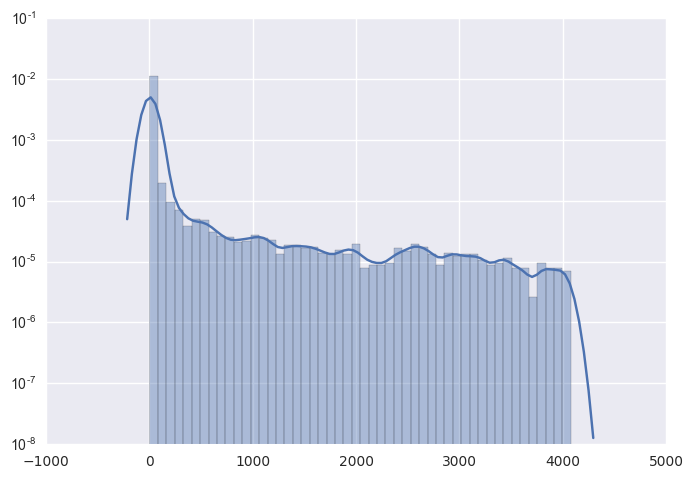

In [60]:
ax = sns.distplot(list_0)
ax.set(yscale="log")
sns.plt.show()